# Análise da população de das vilas e favelas de Belo Horizonte
**Trabalho de Conclusão de Curso**  
Paloma [Seu Sobrenome] – [Engenharia de Software / USP/Esalq]  

## Objetivo
Este notebook realiza uma análise dos dados de alfabetização em comunidades urbanas e favelas de Belo Horizonte, segmentando por sexo, faixa etária e raça/cor.

## Etapas
1. Importação de bibliotecas
2. Leitura da base de dados
3. Limpeza e organização
4. Visualizações iniciais
5. Análises específicas
6. Conclusões

---

In [22]:
!pip install -r ../requirements.txt

In [114]:
import pandas as pd

In [115]:
df = pd.read_csv("../data/raw/vilas-favelas-bh.csv")
df.head()

FID  ID_VILA_FAVELA                  NOME_LOCALIDADE  \
0  VILA_FAVELA.1510            1510          Barão Homem de Melo III   
1  VILA_FAVELA.1463            1463                  Vila Mangueiras   
2  VILA_FAVELA.1405            1405                  Vila Ouro Minas   
3  VILA_FAVELA.1328            1328  Conjunto São Francisco de Assis   
4  VILA_FAVELA.1394            1394              Vila Novo São Lucas   

  APELIDO_LOCALIDADE                         DESC_LOCALIDADE  QTDE_DOMICILIO  \
0                NaN                           Vila / Favela              58   
1            Antenas                           Vila / Favela             573   
2         Fazendinha                           Vila / Favela             184   
3    Trevo / Braúnas  Loteamento Público de Interesse Social              89   
4                NaN                           Vila / Favela             980   

                                FONTE_DOMICILIO DATA_QTDE_DOMICILIO  \
0  URBEL - Estudo Proporcional sobre Censo 2010          01/12/2014   
1                             IBGE - Censo 2010          01/12/2014   
2  URBEL - Estudo Proporcional sobre Censo 2010          01/12/2014   
3                             IBGE - Censo 2010          01/12/2014   
4  URBEL - Estudo Proporcional sobre Censo 2010          01/12/2014   

   QTDE_ESTABELECIMENTO                         FONTE_ESTABELECIMENTO  \
0                     4  URBEL - Estudo Proporcional sobre Censo 2010   
1                    43                             IBGE - Censo 2010   
2                     4  URBEL - Estudo Proporcional sobre Censo 2010   
3                     6                             IBGE - Censo 2010   
4                    64  URBEL - Estudo Proporcional sobre Censo 2010   

  DATA_QTDE_ESTABELECIMENTO  QTDE_POPULACAO_EXISTENTE  \
0                01/12/2014                       182   
1                01/12/2014                      1903   
2                01/12/2014                       647   
3                01/12/2014                       300   
4                01/12/2014                      3436   

                      FONTE_POPULACAO_EXISTENTE DATA_INFO_POP_EXISTENTE  \
0  URBEL - Estudo Proporcional sobre Censo 2010              01/12/2014   
1                             IBGE - Censo 2010              01/12/2014   
2  URBEL - Estudo Proporcional sobre Censo 2010              01/12/2014   
3                             IBGE - Censo 2010              01/12/2014   
4  URBEL - Estudo Proporcional sobre Censo 2010              01/12/2014   

  PLANO_URBANISTICO                                          GEOMETRIA  
0               Sim  MULTIPOLYGON (((607596.555052356 7794516.23748...  
1               Sim  MULTIPOLYGON (((600523.576781815 7786596.26824...  
2               Sim  MULTIPOLYGON (((614106.587050401 7805290.31118...  
3               Não  MULTIPOLYGON (((603504.080812885 7806926.82835...  
4               Sim  MULTIPOLYGON (((614277.415731508 7795920.39820...

In [116]:
df.columns

Index(['FID', 'ID_VILA_FAVELA', 'NOME_LOCALIDADE', 'APELIDO_LOCALIDADE',
       'DESC_LOCALIDADE', 'QTDE_DOMICILIO', 'FONTE_DOMICILIO',
       'DATA_QTDE_DOMICILIO', 'QTDE_ESTABELECIMENTO', 'FONTE_ESTABELECIMENTO',
       'DATA_QTDE_ESTABELECIMENTO', 'QTDE_POPULACAO_EXISTENTE',
       'FONTE_POPULACAO_EXISTENTE', 'DATA_INFO_POP_EXISTENTE',
       'PLANO_URBANISTICO', 'GEOMETRIA'],
      dtype='object')

In [117]:
df = df.drop(columns=['FID', 'DESC_LOCALIDADE', 'FONTE_DOMICILIO', 'DATA_QTDE_DOMICILIO', 'QTDE_ESTABELECIMENTO',
                      'FONTE_ESTABELECIMENTO', 'DATA_QTDE_ESTABELECIMENTO', 'FONTE_POPULACAO_EXISTENTE', 
                      'DATA_INFO_POP_EXISTENTE', 'PLANO_URBANISTICO'
                     ])
df.head()

ID_VILA_FAVELA                  NOME_LOCALIDADE APELIDO_LOCALIDADE  \
0            1510          Barão Homem de Melo III                NaN   
1            1463                  Vila Mangueiras            Antenas   
2            1405                  Vila Ouro Minas         Fazendinha   
3            1328  Conjunto São Francisco de Assis    Trevo / Braúnas   
4            1394              Vila Novo São Lucas                NaN   

   QTDE_DOMICILIO  QTDE_POPULACAO_EXISTENTE  \
0              58                       182   
1             573                      1903   
2             184                       647   
3              89                       300   
4             980                      3436   

                                           GEOMETRIA  
0  MULTIPOLYGON (((607596.555052356 7794516.23748...  
1  MULTIPOLYGON (((600523.576781815 7786596.26824...  
2  MULTIPOLYGON (((614106.587050401 7805290.31118...  
3  MULTIPOLYGON (((603504.080812885 7806926.82835...  
4  MULTIPOLYGON (((614277.415731508 7795920.39820...

In [118]:
import geopandas as gpd
from shapely import wkt

In [119]:
df["GEOMETRIA"] = df["GEOMETRIA"].apply(wkt.loads)

gdf = gpd.GeoDataFrame(df, geometry="GEOMETRIA")

gdf.set_crs(epsg=31983, inplace=True)


ID_VILA_FAVELA                  NOME_LOCALIDADE  \
0              1510          Barão Homem de Melo III   
1              1463                  Vila Mangueiras   
2              1405                  Vila Ouro Minas   
3              1328  Conjunto São Francisco de Assis   
4              1394              Vila Novo São Lucas   
..              ...                              ...   
213            1516          Vila Alto dos Pinheiros   
214            1450             Trinta e Um de Março   
215            1361                     Vila Sesc II   
216            1401                      Vila da Luz   
217            1424                    Vila Ipiranga   

                  APELIDO_LOCALIDADE  QTDE_DOMICILIO  \
0                                NaN              58   
1                            Antenas             573   
2                         Fazendinha             184   
3                    Trevo / Braúnas              89   
4                                NaN             980   
..                               ...             ...   
213  Vila João Pinheiro / Vila Áurea              55   
214                           Cicobe             538   
215                              NaN               7   
216                              NaN             492   
217                     Caixa D'Água              62   

     QTDE_POPULACAO_EXISTENTE  \
0                         182   
1                        1903   
2                         647   
3                         300   
4                        3436   
..                        ...   
213                       161   
214                      1525   
215                        25   
216                      1491   
217                       179   

                                             GEOMETRIA  
0    MULTIPOLYGON (((607596.555 7794516.237, 607603...  
1    MULTIPOLYGON (((600523.577 7786596.268, 600537...  
2    MULTIPOLYGON (((614106.587 7805290.311, 614104...  
3    MULTIPOLYGON (((603504.081 7806926.828, 603493...  
4    MULTIPOLYGON (((614277.416 7795920.398, 614239...  
..                                                 ...  
213  MULTIPOLYGON (((604034.455 7796267.031, 604023...  
214  MULTIPOLYGON (((604689.896 7796959.544, 604694...  
215  MULTIPOLYGON (((607251.912 7809979.323, 607251...  
216  MULTIPOLYGON (((615720.052 7804042.658, 615701...  
217  MULTIPOLYGON (((611646.063 7800612.489, 611648...  

[218 rows x 6 columns]

<Axes: >

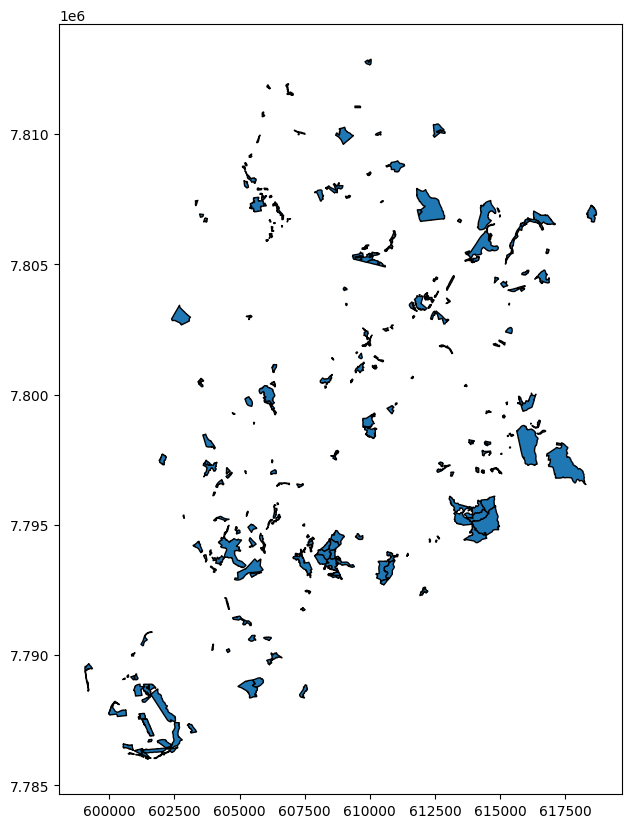

In [120]:
gdf.plot(figsize=(10, 10), edgecolor="black")

<Axes: >

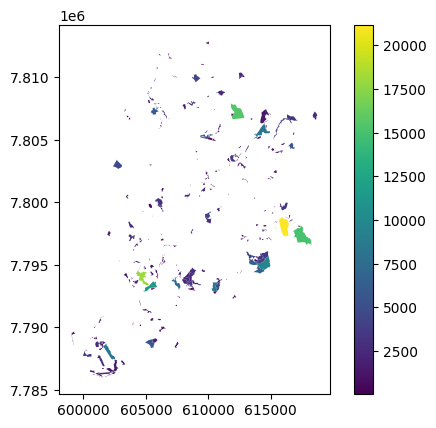

In [121]:
gdf.plot(column="QTDE_POPULACAO_EXISTENTE", legend=True, cmap="viridis")

In [122]:
import folium
from folium import GeoJson
from shapely import wkt
from folium.features import GeoJsonTooltip

In [123]:
# 1. Load CSVs
df_vilas_favelas = pd.read_csv("../data/raw/vilas-favelas-bh.csv")
df_bh = pd.read_csv("../data/raw/bairro-oficial.csv")

# 2. Convert geometry column (WKT to shapely)
df_vilas_favelas["geometry"] = df_vilas_favelas["GEOMETRIA"].apply(wkt.loads)
df_bh ["geometry"] = df_bh["GEOMETRIA"].apply(wkt.loads)

# 3. Create GeoDataFrames with CRS
gdf_vilas_favelas = gpd.GeoDataFrame(df_vilas_favelas, geometry="geometry", crs="EPSG:31983")
gdf_bh = gpd.GeoDataFrame(df_bh, geometry="geometry", crs="EPSG:31983")

# 4. Converts to WGS 84 (for use in Folium)
gdf_vilas_favelas = gdf_vilas_favelas.to_crs(epsg=4326)
gdf_bh = gdf_bh.to_crs(epsg=4326)

# 5. Convert to a projected CRS before calculating the centroid
gdf_proj = gdf_vilas_favelas.to_crs(epsg=31983)
centroid = gdf_proj.geometry.centroid

# 6. Converts the centroid back to WGS 84 (EPSG:4326)
centroid_wgs84 = centroid.to_crs(epsg=4326)

# 7. Gets the mean centroid for latitude and longitude
center_lat = centroid_wgs84.y.mean()
center_lon = centroid_wgs84.x.mean()

# 8. Filters the polygons of the GeoDataFrame
gdf_vilas_favelas['NOME_LOCALIDADE'] = gdf_vilas_favelas['NOME_LOCALIDADE'].astype(str).str.strip()
gdf_bh['NOME'] = gdf_bh['NOME'].astype(str).str.strip().str.lower()

show_map = folium.Map(
    location=[center_lat, center_lon], 
    zoom_start=12,
    tiles="CartoDB Positron"
)

# 9. Style function for polygons of all neighborhoods in BH
def gray_map(feature):
    return {
        'fillColor': '#d3d3d3',
        'color': '#d3d3d3',
        'weight': 1,
        'fillOpacity': 0.5
    }

# 10. Style function for village and favela polygons
def vilas_favelas_map(feature):
    return {
        'fillColor': '#ff7800',
        'color': '#ff7800',
        'weight': 2,
        'fillOpacity': 0.7
    }

# 11. Adds background polygons to the map
folium.GeoJson(
    gdf_bh,
    style_function=gray_map
).add_to(show_map)

# 14. Adds village and favela polygons to the map
geojson_vilas_favelas = folium.GeoJson(
    gdf_vilas_favelas,
    style_function=vilas_favelas_map,
    tooltip=GeoJsonTooltip(fields=["NOME_LOCALIDADE"], aliases=["Localidade:"])
)

geojson_vilas_favelas.add_to(show_map)

# 15. Display the map on the notebook
show_map


In [124]:
from collections import Counter
from io import StringIO

# Carregue o arquivo como lista de linhas
with open("../data/raw/vilas-favelas-ibge.csv", encoding="utf-8") as f:
    lines = f.readlines()

# Tenta pular as 5 primeiras linhas
df = pd.read_csv("../data/raw/vilas-favelas-ibge.csv", sep=",", skiprows=5, header=0)

df.head()

Favela e Comunidade Urbana 2022    Sexo Grupo de idade Branca Preta  \
0  Vila Paquetá - Belo Horizonte (MG)  Homens   15 a 19 anos      1     6   
1  Vila Paquetá - Belo Horizonte (MG)  Homens   20 a 24 anos      4    15   
2  Vila Paquetá - Belo Horizonte (MG)  Homens   25 a 34 anos      6    17   
3  Vila Paquetá - Belo Horizonte (MG)  Homens   35 a 44 anos      7    12   
4  Vila Paquetá - Belo Horizonte (MG)  Homens   45 a 54 anos      -    12   

  Amarela Parda Indígena Sem declaração Branca.1 Preta.1 Amarela.1 Parda.1  \
0       -    11        -              -        -       -         -       -   
1       -    22        -              -        -       -         -       1   
2       -    27        -              -        -       1         -       -   
3       -    18        -              -        -       -         -       1   
4       -    21        -              -        -       1         -       -   

  Indígena.1 Sem declaração.1  
0          -                -  
1          -                -  
2          -                -  
3          -                -  
4          -                -

In [125]:
df = df.drop(columns=['Sem declaração.1'])
df.head()

Favela e Comunidade Urbana 2022    Sexo Grupo de idade Branca Preta  \
0  Vila Paquetá - Belo Horizonte (MG)  Homens   15 a 19 anos      1     6   
1  Vila Paquetá - Belo Horizonte (MG)  Homens   20 a 24 anos      4    15   
2  Vila Paquetá - Belo Horizonte (MG)  Homens   25 a 34 anos      6    17   
3  Vila Paquetá - Belo Horizonte (MG)  Homens   35 a 44 anos      7    12   
4  Vila Paquetá - Belo Horizonte (MG)  Homens   45 a 54 anos      -    12   

  Amarela Parda Indígena Sem declaração Branca.1 Preta.1 Amarela.1 Parda.1  \
0       -    11        -              -        -       -         -       -   
1       -    22        -              -        -       -         -       1   
2       -    27        -              -        -       1         -       -   
3       -    18        -              -        -       -         -       1   
4       -    21        -              -        -       1         -       -   

  Indígena.1  
0          -  
1          -  
2          -  
3          -  
4          -

In [126]:
import pandas as pd
import numpy as np

# Substituir "-" por NaN e converter para numérico
df = df.replace("-", np.nan)
df.iloc[:, 3:] = df.iloc[:, 3:].apply(pd.to_numeric, errors="coerce")

# Derreter colunas sem e com .1 separadamente
alfabetizado = df.melt(
    id_vars=['Favela e Comunidade Urbana 2022', 'Sexo', 'Grupo de idade'],
    value_vars=['Branca', 'Preta', 'Amarela', 'Parda', 'Indígena'],
    var_name='raca',
    value_name='quantidade'
)
alfabetizado['situacao'] = 'Alfabetizado'

nao_alfabetizado = df.melt(
    id_vars=['Favela e Comunidade Urbana 2022', 'Sexo', 'Grupo de idade'],
    value_vars=['Branca.1', 'Preta.1', 'Amarela.1', 'Parda.1', 'Indígena.1'],
    var_name='raca',
    value_name='quantidade'
)
nao_alfabetizado['situacao'] = 'Não Alfabetizado'

# Remover o .1 do nome da raça
nao_alfabetizado['raca'] = nao_alfabetizado['raca'].str.replace('.1', '', regex=False)

# Juntar as duas partes
df_final = pd.concat([alfabetizado, nao_alfabetizado], ignore_index=True)

# Renomear colunas
df_final.rename(columns={
    'Favela e Comunidade Urbana 2022': 'local',
    'Sexo': 'sexo',
    'Grupo de idade': 'faixa_etaria'
}, inplace=True)

df_final['local'] = df_final['local'].str.replace(' - Belo Horizonte (MG)', '', regex=False)

df_final['quantidade'] = df_final['quantidade'].astype('Int64')

# Reordenar colunas se quiser
df_final = df_final[['local', 'sexo', 'faixa_etaria', 'situacao', 'raca', 'quantidade']]


In [127]:
df_final

local      sexo     faixa_etaria          situacao      raca  \
0      Vila Paquetá    Homens     15 a 19 anos      Alfabetizado    Branca   
1      Vila Paquetá    Homens     20 a 24 anos      Alfabetizado    Branca   
2      Vila Paquetá    Homens     25 a 34 anos      Alfabetizado    Branca   
3      Vila Paquetá    Homens     35 a 44 anos      Alfabetizado    Branca   
4      Vila Paquetá    Homens     45 a 54 anos      Alfabetizado    Branca   
...             ...       ...              ...               ...       ...   
39235    Santa Rita  Mulheres     45 a 54 anos  Não Alfabetizado  Indígena   
39236    Santa Rita  Mulheres     55 a 64 anos  Não Alfabetizado  Indígena   
39237    Santa Rita  Mulheres  65 anos ou mais  Não Alfabetizado  Indígena   
39238    Santa Rita  Mulheres  75 anos ou mais  Não Alfabetizado  Indígena   
39239    Santa Rita  Mulheres  80 anos ou mais  Não Alfabetizado  Indígena   

       quantidade  
0               1  
1               4  
2               6  
3               7  
4            <NA>  
...           ...  
39235        <NA>  
39236        <NA>  
39237        <NA>  
39238        <NA>  
39239        <NA>  

[39240 rows x 6 columns]

In [142]:
import pandas as pd
import re
import unicodedata

# Função de normalização
def normalizar(texto):
    if pd.isna(texto):
        return ""
    texto = texto.lower()
    texto = unicodedata.normalize("NFKD", texto).encode("ASCII", "ignore").decode("utf-8")
    texto = re.sub(r"[-]", " ", texto)  # quero remover os acentos
    texto = re.sub(r'\b(vila|favela|comunidade|bairro)\b', '', texto)
    texto = re.sub(r"\s+", " ", texto)
    return texto.strip()


# Aplica normalização
df_final['local_normalizado'] = df_final['local'].apply(normalizar)
df_vilas_favelas['localidade_normalizada'] = df_vilas_favelas['NOME_LOCALIDADE'].apply(normalizar)

# Converte para conjuntos
locais_final_norm = set(df_final['local_normalizado'].unique())
locais_bh_norm = set(df_vilas_favelas['localidade_normalizada'].unique())

# Diferenças
nao_encontrados = locais_final_norm - locais_bh_norm
sobrando_no_bh = locais_bh_norm - locais_final_norm

# Exibe os resultados
print("No df_final mas não no BH:")
print(sorted(nao_encontrados))

print("\nNo BH mas não no df_final:")
print(sorted(sobrando_no_bh))
print(f"Total: {len(sobrando_no_bh)}")

# Remove do df_final os locais que estão em nao_encontrados
df_final = df_final[~df_final['local_normalizado'].isin(nao_encontrados)].copy()


No df_final mas não no BH:
[]

No BH mas não no df_final:
['ana lucia', 'belem', 'bispo de maura', 'brasilia', 'camponesa iii', 'castanheira', 'confisco', 'conjunto floramar', 'conjunto jatoba', 'conjunto providencia', 'conjunto serra verde', 'da area', 'da paz', 'guanabara', 'independencia v', 'jardim do vale', 'jardim felicidade', 'lorena', 'madre gertrudes iv', 'mala e cuia', 'maravilha', 'mariquinhas', 'minas solidaria granja iv', 'novo aarao reis', 'piratininga a', 'real i', 'rica sao jose', 'santa lucia', 'sao bento', 'sao jose', 'sesc i', 'sesc ii', 'teodomiro cruz', 'varzea da palma', 'vera cruz ii', 'verde', 'viveiro']
Total: 37


In [143]:
print (df_final['local'].dropna().unique())
print(len(df_final['local'].unique()))


['Vila Paquetá' 'Vila Nova dos Milionários' 'Vila Mantiqueira'
 'Vila Santo Antônio Barroquinha' 'Vila Cemig' 'Cônego Pinheiro'
 'São Sebastião' 'Vila Independência I' 'Vila Nossa Senhora do Rosário'
 'Vila Primeiro de Maio' 'Vila Antena Montanhês' 'Vila Esplanada'
 'Novo Ouro Preto' 'Vila Piratininga' 'Vila Califórnia' 'Vila União'
 'Três Marias' 'Delta' 'Nossa Senhora da Aparecida' 'Vila Santa Mônica'
 'São Vicente' 'Vila Trinta e Um de Março' 'Fazendinha' 'Vila dos Anjos'
 'São Francisco das Chagas' 'Vila Coqueiral' 'Nossa Senhora da Conceição'
 'Vila Nossa Senhora Aparecida' 'Vila São Paulo' 'Vila Jardim Leblon'
 'Vila Sumaré' 'Marçola' 'Vila Copacabana' 'Apolônia' 'Vila Santa Rosa'
 'Universo' 'Tiradentes' 'Estrela' 'Vila Nova Cachoeirinha I'
 'Vila São Tomáz' 'Vila Dias' 'Vila Aeroporto' 'Vila Aeroporto - Jaraguá'
 'Pedreira Prado Lopes' 'Monte São José' 'Biquinhas' 'Senhor dos Passos'
 'Marmiteiros' 'Santa Sofia' 'Santa Rita de Cássia'
 'Vila Barão Homem de Melo IV' 'Ventosa' 'B

In [144]:
df = pd.read_csv("../data/raw/vilas-favelas-bh.csv")
print (df['NOME_LOCALIDADE'].dropna().unique())
print(len(df['NOME_LOCALIDADE'].unique()))


['Barão Homem de Melo III' 'Vila Mangueiras' 'Vila Ouro Minas'
 'Conjunto São Francisco de Assis' 'Vila Novo São Lucas'
 'Vila Santa Mônica' 'Vila São José' 'Vila Primeiro de Maio'
 'Vila São Paulo' 'Vila Mantiqueira' 'Vila Vera Cruz I' 'São Jorge I'
 'Mirante' 'Zilah Spósito' 'Antena Montanhês' 'Vila Califórnia' 'Imbaúbas'
 'Cônego Pinheiro' 'Monte São José' 'São Jorge II' 'Marieta I'
 'Fazendinha' 'Vila Jardim Alvorada' 'Vila da Área' 'Marieta II'
 'Vila Pinho' 'Novo Ouro Preto' 'Camponesa III' 'Maravilha ' 'Marçola'
 'São Francisco das Chagas' 'Vila Nova Cintra' 'Belém' 'Santa Rita'
 'Novo Lajedo' 'Grotinha' 'Vila Jardim Leblon' 'Vila São Tomaz'
 'Minas Solidária - Granja IV' 'Vila São Gabriel' 'Conjunto Floramar'
 'Flamengo' 'Nova América' 'Boa Esperança' 'Senhor dos Passos'
 'Vila Batik' 'Universo' 'Ambrosina' 'Vila Rica São José'
 'Vila Madre Gertrudes I' 'Leonina' 'Pantanal' 'Vila Santa Lúcia'
 'Mariquinhas' 'Nossa Senhora da Conceição' 'Vila Nova' 'Vila Fumec'
 'Nossa Senhora d

In [146]:
# Diferença entre valores únicos de df_final['local'] e df_bh['NOME_LOCALIDADE']
diferenca = set(df_final['local'].dropna().unique()) - set(df_vilas_favelas['NOME_LOCALIDADE'].dropna().unique())

print("No df_final['local'] mas não em df_bh['NOME_LOCALIDADE']:")
print(sorted(diferenca))
print(f"Total: {len(diferenca)}")

diferenca_inversa = set(df_vilas_favelas['NOME_LOCALIDADE'].dropna().unique()) - set(df_final['local'].dropna().unique())

print("\nNo df['NOME_LOCALIDADE'] mas não em df_final['local']:")
print(sorted(diferenca_inversa))
print(f"Total: {len(diferenca_inversa)}")



No df_final['local'] mas não em df_bh['NOME_LOCALIDADE']:
['Beira Linha', 'Conego Pinheiro A', 'Tiradentes', 'Vila Aeroporto - Jaraguá', 'Vila Antena Montanhês', 'Vila Barão Homem de Melo IV', 'Vila Canto do Sabiá', 'Vila Coqueiral', 'Vila Esperança', 'Vila Real II', 'Vila Santo Antônio Barroquinha', 'Vila São Dimas', 'Vila São Rafael', 'Vila São Tomáz', 'Vila Trinta e Um de Março']
Total: 15

No df['NOME_LOCALIDADE'] mas não em df_final['local']:
['Ana Lúcia', 'Antena Montanhês', 'Barão Homem de Melo IV', 'Beira-Linha', 'Belém', 'Bispo de Maura', 'Brasília', 'Camponesa III', 'Canto do Sabiá', 'Castanheira', 'Confisco', 'Conjunto Floramar', 'Conjunto Jatobá', 'Conjunto Providência', 'Conjunto Serra Verde', 'Coqueiral', 'Cônego Pinheiro A', 'Guanabara', 'Jardim Felicidade', 'Jardim do Vale', 'Lorena', 'Mala e Cuia', 'Maravilha ', 'Mariquinhas', 'Minas Solidária - Granja IV', 'Novo Aarão Reis', 'Real I', 'Real II', 'Santo Antônio Barroquinha', 'São Dimas', 'São Rafael', 'Teodomiro Cruz',